In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pip install pandas tensorflow pyarrow

In [7]:
!pip install -U sentence-transformers

libraries

In [8]:
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq
import nltk
import requests
import json
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import regex as re
from nltk.corpus import stopwords
import lightgbm as lgb
from xgboost import XGBClassifier
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sentence_transformers import SentenceTransformer, util


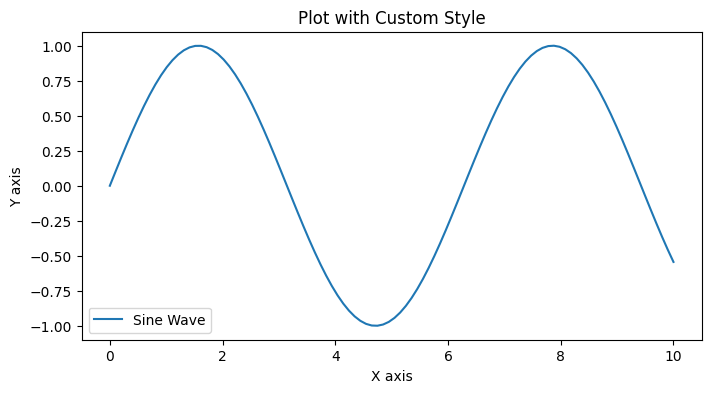

In [9]:
# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sine Wave')
plt.title('Plot with Custom Style')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


In [9]:
print(tf.__version__)

2.15.0


In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# set random seed
np.random.seed(seed=42)

In [12]:
PATH = '/content/drive/MyDrive/CA684ML/train/'

In [13]:
!ls -l {PATH}

total 12999833
-rw------- 1 root root  38320585 Feb  6 11:02 part-00000-of-00362.parquet
-rw------- 1 root root   4145028 Feb  6 11:02 part-00001-of-00362.parquet
-rw------- 1 root root   6142779 Feb  6 11:02 part-00002-of-00362.parquet
-rw------- 1 root root 158151319 Feb  6 11:02 part-00003-of-00362.parquet
-rw------- 1 root root  22516157 Feb  6 11:02 part-00004-of-00362.parquet
-rw------- 1 root root   4454426 Feb  6 11:02 part-00005-of-00362.parquet
-rw------- 1 root root   4051725 Feb  6 11:02 part-00006-of-00362.parquet
-rw------- 1 root root   5792423 Feb  6 11:02 part-00007-of-00362.parquet
-rw------- 1 root root 122805357 Feb  6 11:02 part-00008-of-00362.parquet
-rw------- 1 root root   6291776 Feb  6 11:02 part-00009-of-00362.parquet
-rw------- 1 root root  58338458 Feb  6 11:02 part-00010-of-00362.parquet
-rw------- 1 root root  63960821 Feb  6 11:02 part-00011-of-00362.parquet
-rw------- 1 root root   4775616 Feb  6 11:02 part-00012-of-00362.parquet
-rw------- 1 root root 

# test train

In [14]:
parquet_filenames_train = !ls -1 {PATH}

In [15]:
parquet_filenames_train[:3]

['part-00000-of-00362.parquet',
 'part-00001-of-00362.parquet',
 'part-00002-of-00362.parquet']

In [16]:
parquet_filenames_test = !ls -1 {PATH}

In [17]:
parquet_filenames_test[:3]

['part-00000-of-00362.parquet',
 'part-00001-of-00362.parquet',
 'part-00002-of-00362.parquet']

Training dataset

In [19]:
!ls "/content/drive/MyDrive/CA684ML/train"

part-00000-of-00362.parquet  part-00121-of-00362.parquet  part-00242-of-00362.parquet
part-00001-of-00362.parquet  part-00122-of-00362.parquet  part-00243-of-00362.parquet
part-00002-of-00362.parquet  part-00123-of-00362.parquet  part-00244-of-00362.parquet
part-00003-of-00362.parquet  part-00124-of-00362.parquet  part-00245-of-00362.parquet
part-00004-of-00362.parquet  part-00125-of-00362.parquet  part-00246-of-00362.parquet
part-00005-of-00362.parquet  part-00126-of-00362.parquet  part-00247-of-00362.parquet
part-00006-of-00362.parquet  part-00127-of-00362.parquet  part-00248-of-00362.parquet
part-00007-of-00362.parquet  part-00128-of-00362.parquet  part-00249-of-00362.parquet
part-00008-of-00362.parquet  part-00129-of-00362.parquet  part-00250-of-00362.parquet
part-00009-of-00362.parquet  part-00130-of-00362.parquet  part-00251-of-00362.parquet
part-00010-of-00362.parquet  part-00131-of-00362.parquet  part-00252-of-00362.parquet
part-00011-of-00362.parquet  part-00132-of-00362.parqu

In [26]:
def get_parquet_data(N):
    """Read parquet data from multiple files based on the specified count."""

    # Define the path to the dataset directory
    PATH = '/content/drive/MyDrive/CA684ML/train/'  # Base path to the train data

    # Build file paths
    filenames = [
        f"{PATH}part-{i:05d}-of-{N:05d}.parquet"
        for i in range(N)
    ]

    # Load dataframes and handle potential file not found errors
    dataframes = []
    for filename in filenames:
        try:
            dataframes.append(pd.read_parquet(filename, engine='pyarrow'))
        except FileNotFoundError:
            print(f"File not found: {filename}")
            continue  # Skip files that aren't found

    # Concatenate all dataframes into a single dataframe
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()  # Return empty DataFrame if no files were loaded

# Example usage
N = 362  # Number of files expected
df_train = get_parquet_data(N)
print(df_train.head())

   product_id                                              title  \
0   699437355  Children&#39;s circle skirt BLUE GALAXY made o...   
1  1323699538  Cow Birthday Tutu for kids, Farm Theme Bday Ou...   
2  1142910558  Zebra print tutu, animal print Skirt, World bo...   
3  1320296928  Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...   
4   854901795  Bumblebee tutu yellow and black tutu halloween...   

                                         description  \
0  The fuxandfriends children&#39;s full circle s...   
1  💄This listing is for the TUTU ONLY (double rib...   
2  All tutus are handmade to order with two layer...   
3  Step aside because the princess pop star is he...   
4  Sparkle, shimmer, twirl and spin,\nThis tutu&#...   

                                                tags      type room  \
0                                                     physical        
1  birthday outfit,girls birthday shirt,Tutu outf...  physical        
2  black and white tutu,striped skirt,zeb

In [21]:
def get_parquet_data_test(N):
    """Read parquet data from multiple files based on the specified count."""

    # Define the path to the dataset directory
    PATH = '/content/drive/MyDrive/CA684ML/test/'  # path to the test data

    # Build file paths
    filenames = [
        f"{PATH}part-{i:05d}-of-{N:05d}.parquet"
        for i in range(N)
    ]

    # Load dataframes and handle potential file not found errors
    dataframes = []
    for filename in filenames:
        try:
            dataframes.append(pd.read_parquet(filename, engine='pyarrow'))
        except FileNotFoundError:
            print(f"File not found: {filename}")
            continue

    # Concatenate all dataframes into a single dataframe
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()  # Return empty DataFrame if no files were loaded

# Example usage
N = 362  # Number of files expected
df_test = get_parquet_data(N)
print(df_test.head())

   product_id                                              title  \
0   699437355  Children&#39;s circle skirt BLUE GALAXY made o...   
1  1323699538  Cow Birthday Tutu for kids, Farm Theme Bday Ou...   
2  1142910558  Zebra print tutu, animal print Skirt, World bo...   
3  1320296928  Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...   
4   854901795  Bumblebee tutu yellow and black tutu halloween...   

                                         description  \
0  The fuxandfriends children&#39;s full circle s...   
1  💄This listing is for the TUTU ONLY (double rib...   
2  All tutus are handmade to order with two layer...   
3  Step aside because the princess pop star is he...   
4  Sparkle, shimmer, twirl and spin,\nThis tutu&#...   

                                                tags      type room  \
0                                                     physical        
1  birthday outfit,girls birthday shirt,Tutu outf...  physical        
2  black and white tutu,striped skirt,zeb

In [28]:
# Display the number of rows in the train dataset
print(f"Number of rows in train: {len(df_train):,}")

Number of rows in train: 229,624


In [29]:
# Display the number of unique products in the train dataset
print(f"Number of unique products in train: {len(df_train['product_id'].unique()):,}")

Number of unique products in train: 229,624


In [30]:
# Display the number of columns in the train dataset
print(f"Number of columns in train: {len(df_train.columns):,}")

Number of columns in train: 26


In [31]:
print(df_train.isna().sum())

product_id              0
title                   0
description             0
tags                    0
type                    0
room                    0
craft_type              0
recipient               0
material                0
occasion                0
holiday                 0
art_subject             0
style                   0
shape                   0
pattern                 0
bottom_category_id      0
bottom_category_text    0
top_category_id         0
top_category_text       0
primary_color_id        0
primary_color_text      0
secondary_color_id      0
secondary_color_text    0
image/encoded           0
image/width             0
image/height            0
dtype: int64


In [32]:
print(df_train.columns)

Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text', 'image/encoded', 'image/width', 'image/height'],
      dtype='object')


In [33]:
# Extract unique primary colors from the dataset
PRIMARY_COLORS = df_train['primary_color_id'].unique()
NUM_PRIMARY_COLORS = len(PRIMARY_COLORS)

# Format the output string to report the number of unique primary colors
output_message = f"Number of primary colors in train: {NUM_PRIMARY_COLORS:,}"
print(output_message)

Number of primary colors in train: 19


In [34]:
print(f"Number of top categories in train: {len(df_train['top_category_text'].unique()):,}")

Number of top categories in train: 15


In [35]:
print(f"Number of bottom categories in train: {len(df_train['bottom_category_text'].unique()):,}")

Number of bottom categories in train: 2,609


In [36]:
# Calculate the number of unique top categories
NUM_TOP_CATEGORIES = len(df_train['top_category_id'].unique())

# Format the output string to report the number of unique top categories
output_message = f"Number of top categories in train: {NUM_TOP_CATEGORIES:,}"
print(output_message)

Number of top categories in train: 15


In [37]:
# Calculate the number of unique top categories
NUM_BOTTOM_CATEGORIES = len(df_train['bottom_category_id'].unique())

# Format the output string to report the number of unique top categories
output_message = f"Number of bottom categories in train: {NUM_BOTTOM_CATEGORIES:,}"
print(output_message)

Number of bottom categories in train: 2,609


In [38]:
# Initialize the maximum title length variable
max_title_length = 0

# Iterate through each title in the 'title' column of df_train
for title in df_train['title']:
    # Check if the title is NaN or None
    if pd.isna(title):
        continue
    # Split the title into words and calculate the length
    title_length = len(title.split())
    # Update the maximum title length if this title's length is greater
    if title_length > max_title_length:
        max_title_length = title_length

# Print the maximum length of titles found
print(f"The maximum number of words in a title is: {max_title_length}")

The maximum number of words in a title is: 39


In [39]:
# Initialize the maximum description length variable
max_description_length = 0

# Iterate through each description in the 'description' column of df_train
for description in df_train['description']:
    # Check if the description is NaN using the pd.isna function
    if pd.isna(description):
        continue
    # Split the description into words and calculate the length
    description_length = len(description.split())
    # Update the maximum description length if this description's length is greater
    if description_length > max_description_length:
        max_description_length = description_length

# Print the maximum length of descriptions found
print(f"The maximum number of words in a description is: {max_description_length}")

The maximum number of words in a description is: 10287


In [40]:
# Count the occurrences of each unique value in the 'top_category_text' column
top_category_counts = pd.value_counts(df_train['top_category_text'], sort=True, ascending=False)

# Display the counts
print(top_category_counts)

home_and_living                54600
craft_supplies_and_tools       33393
clothing                       30143
toys_and_games                 13835
accessories                    12416
paper_and_party_supplies       12207
bath_and_beauty                11327
weddings                       10143
shoes                           8892
art_and_collectibles            8716
jewelry                         7822
electronics_and_accessories     7474
bags_and_purses                 6650
books_movies_and_music          6262
pet_supplies                    5744
Name: top_category_text, dtype: int64


In [41]:
# Define a lighter and more vibrant color sequence
colors = px.colors.qualitative.Pastel1[:15]  # Using a pastel color palette for a fresh look

# Create a new DataFrame with the value counts for each top category
column = 'top_category_text'
category_counts = df_train[column].value_counts().reset_index()
category_counts.columns = [column, 'count']

# Create the horizontal bar chart
fig = px.bar(category_counts,
             x='count',
             y=column,
             orientation='h',
             color=column,
             color_discrete_sequence=colors,
             title="Number of Products per Top Category in a Vibrant Theme")

# Format the x-axis with a simple number format
fig.update_xaxes(title="Number of Products", tickformat=',d')

# Simplify the y-axis label
fig.update_yaxes(title="Categories")

# Adjust the title position to the center for better symmetry
fig.update_layout(title_x=0.5, title_font=dict(size=18))

# Adjust margins to minimize white space
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', margin=dict(l=10, r=10, t=40, b=10))

# Display the chart
fig.show()

In [41]:
import plotly.express as px

# Define a vibrant color for the bars
color = '#FF6347'  # Using a tomato red color

# Create a new DataFrame with the value counts for each category
column = 'primary_color_text'
category_counts = df_train[column].value_counts().reset_index()
category_counts.columns = [column, 'count']

# Create the horizontal bar chart with a different style
fig = px.bar(category_counts,
             x='count',
             y=column,
             orientation='h',
             color_discrete_sequence=[color],  # Single color for all bars
             title="Distribution of Products by Color")

# Enhance the x-axis with formatted labels and adjust axis titles
fig.update_xaxes(title="Number of Products", tickformat=',d')  # Using integer format

# Remove the y-axis label and center the title
fig.update_yaxes(title="")

# Adjust the layout for a sleek look
fig.update_layout(
    title_x=0.5,
    plot_bgcolor='rgba(255, 255, 255, 1)',
    paper_bgcolor='rgba(255, 255, 255, 1)',
    title_font=dict(size=18, color='black'),
    margin=dict(l=10, r=10, t=40, b=10)
)

# Display the chart
fig.show()

In [42]:
#Check values for each color
pd.value_counts(df_train['primary_color_text'], sort=True, ascending=False)

black        30673
white        28609
blue         27649
brown        19867
pink         16029
red          15835
green        15578
beige        12366
silver       10758
gold          9569
other         8985
yellow        7231
purple        6750
orange        5625
clear         4546
rainbow       4404
bronze        2471
copper        1852
rose gold      827
Name: primary_color_text, dtype: int64

In [43]:
unique_colors = df_train[['primary_color_text', 'primary_color_id']].drop_duplicates()

for i, row in unique_colors.iterrows():
    print(f"Color: {row['primary_color_text']}, ID: {row['primary_color_id']}")

Color: blue, ID: 2
Color: pink, ID: 11
Color: white, ID: 17
Color: purple, ID: 12
Color: yellow, ID: 18
Color: red, ID: 14
Color: black, ID: 1
Color: rainbow, ID: 13
Color: beige, ID: 0
Color: green, ID: 9
Color: orange, ID: 10
Color: other, ID: 19
Color: gold, ID: 7
Color: brown, ID: 4
Color: bronze, ID: 3
Color: clear, ID: 5
Color: silver, ID: 16
Color: copper, ID: 6
Color: rose gold, ID: 15


In [44]:
# Calculate the number of unique top categories
num_top_categories = len(df_train['top_category_text'].unique())

# Print the formatted result
print(f"Number of top categories in train: {num_top_categories:,}")


Number of top categories in train: 15


In [45]:
# Calculate the value counts of the 'top_category_text' column
top_category_counts = df_train['top_category_text'].value_counts(sort=True, ascending=False)

# Display the counts
print(top_category_counts)

home_and_living                54600
craft_supplies_and_tools       33393
clothing                       30143
toys_and_games                 13835
accessories                    12416
paper_and_party_supplies       12207
bath_and_beauty                11327
weddings                       10143
shoes                           8892
art_and_collectibles            8716
jewelry                         7822
electronics_and_accessories     7474
bags_and_purses                 6650
books_movies_and_music          6262
pet_supplies                    5744
Name: top_category_text, dtype: int64


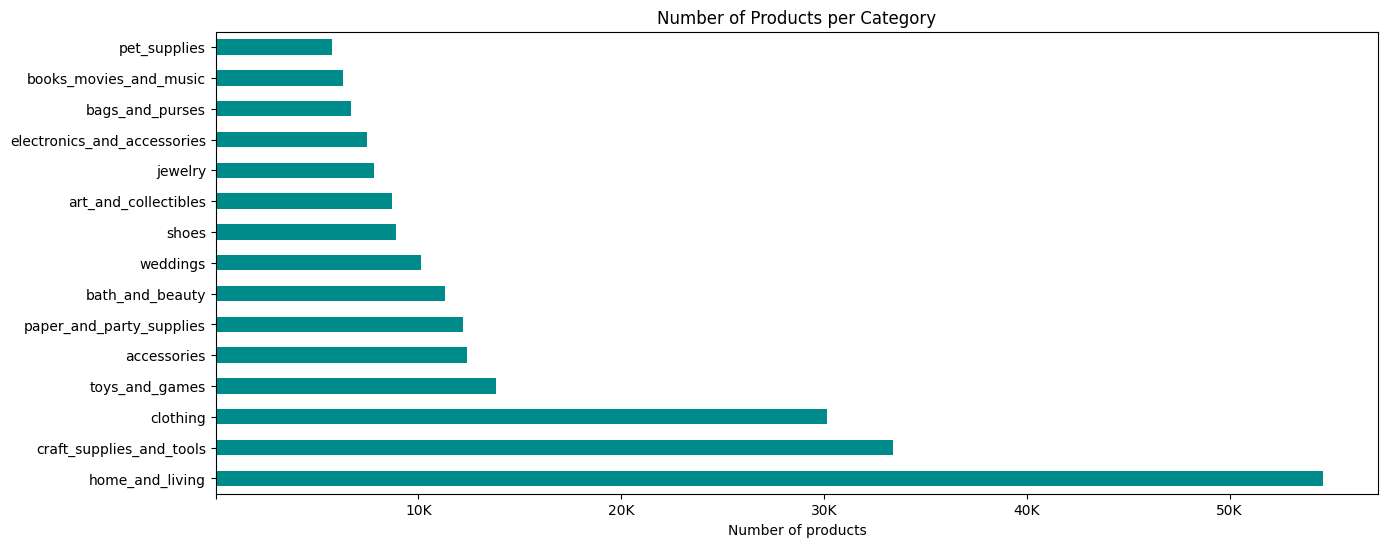

In [46]:
# Set the size of the figure
figsize = (15, 6)

# Specify the column for the data
column = 'top_category_text'

# Limits and steps for the x-axis
x_limit = 60000
x_step = 10000

# Choose a color for the bars
color = 'darkcyan'

# Create the figure and axes objects
figure, ax = plt.subplots(figsize=figsize)

# Plot the data
pd.value_counts(df_train[column], sort=True, ascending=False).plot.barh(color=color, ax=ax)

# Set the title of the plot
plt.title("Number of Products per Category")

# Custom x-axis labels
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)

# Label for x-axis
plt.xlabel('Number of products')

# Hide the first x-tick label for cleaner look
plt.setp(ax.get_xticklabels()[0], visible=False)

# Display the plot
plt.show()

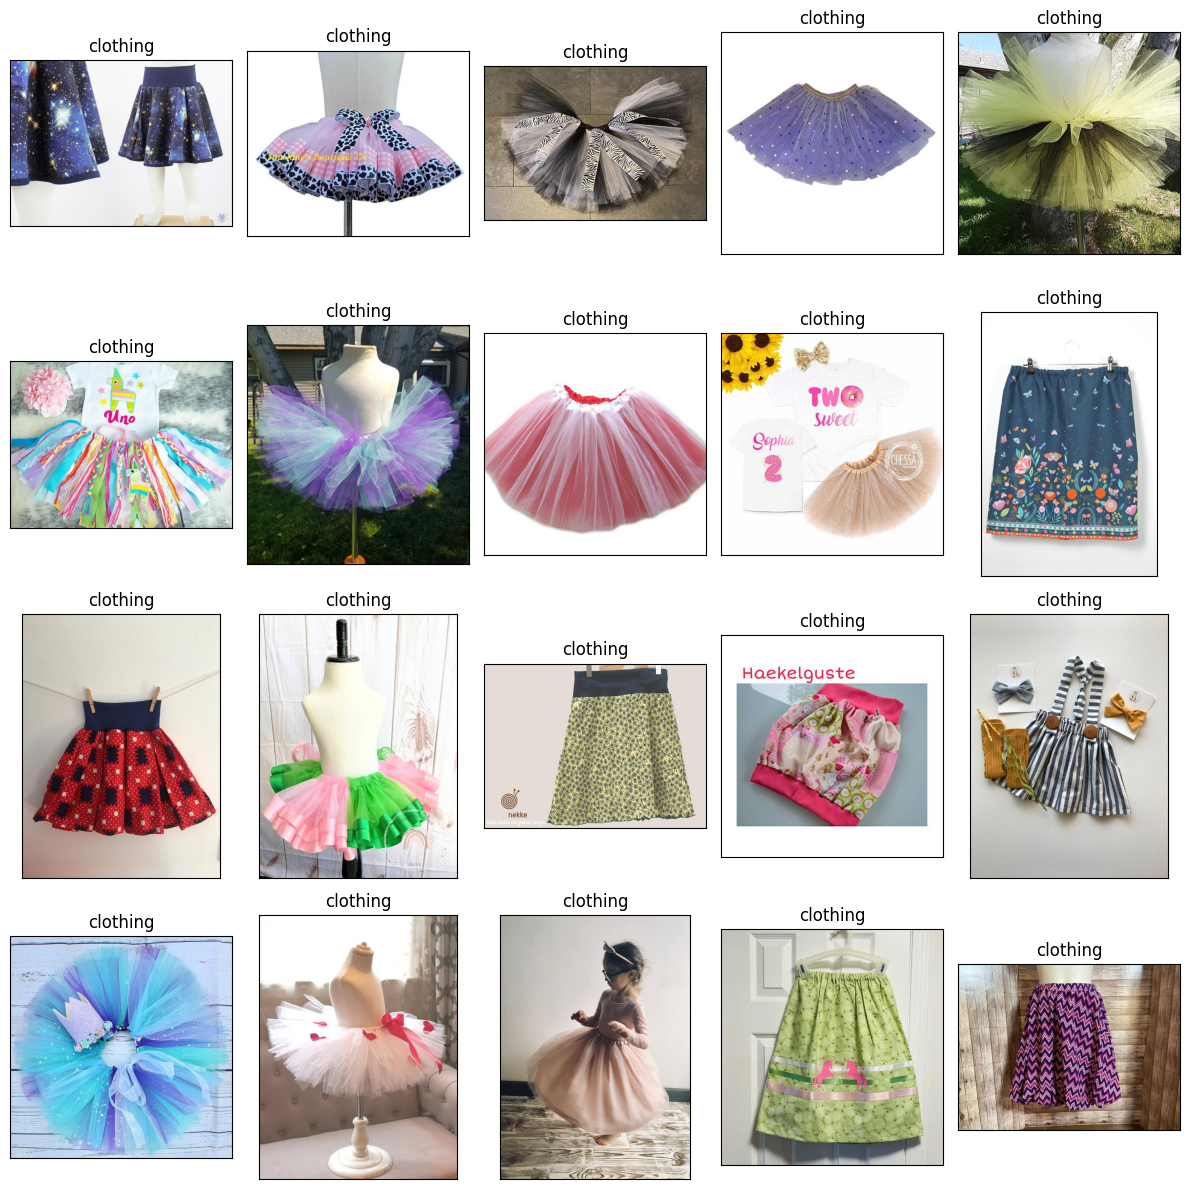

In [47]:
def show_images(dataframe, N=100):
    # Determine number of columns and rows for the subplot
    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows  # Each row has a height of 3

    # Initialize the plot with specified figure size
    plt.figure(figsize=(12, plt_height))

    for i, row in dataframe.iterrows():
        if i >= N:  # Stop if N images are processed
            break

        # Retrieve image data from DataFrame
        img_bytes = row["image/encoded"]
        label = row["top_category_text"] if "top_category_text" in row else "unknown"

        # Convert bytes to an image
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)

        # Plotting the image
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.title(label, fontsize=12)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

    plt.tight_layout()  # Adjust layout to not overlap
    plt.show()

# Call the function with your DataFrame
# Ensure that your DataFrame 'df_train' has the 'image/encoded' and 'top_category_text' columns properly populated
# You might want to adjust N depending on how many images you want to display
show_images(df_train, N=20)

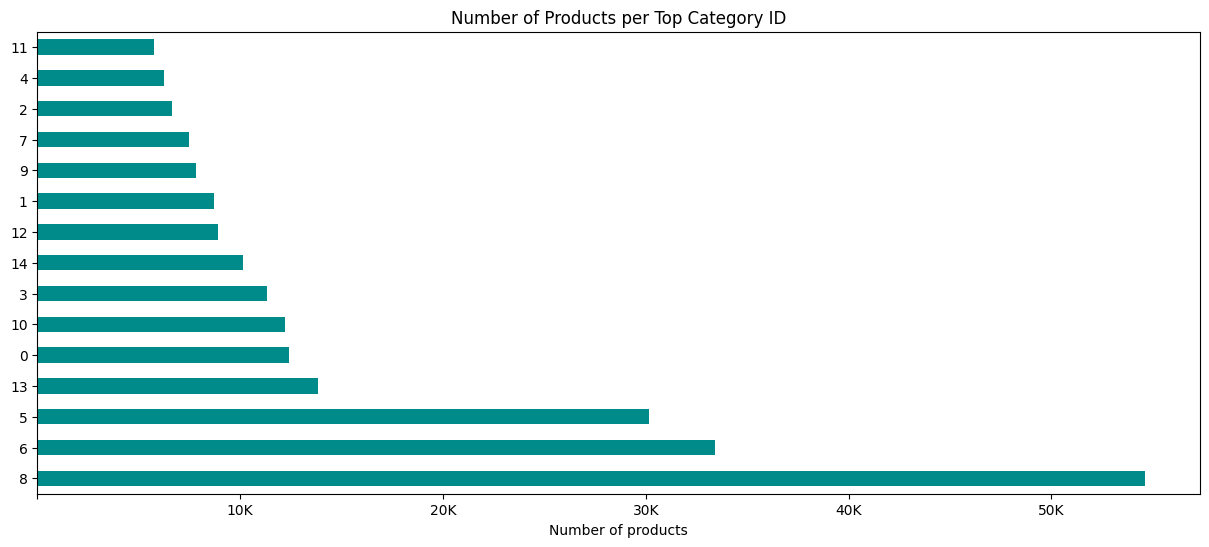

In [48]:
# Set the size of the figure
figsize = (15, 6)

# Specify the column for the data
column = 'top_category_id'  # Changed to top_category_id

# Limits and steps for the x-axis
x_limit = 60000
x_step = 10000

# Choose a color for the bars
color = 'darkcyan'

# Create the figure and axes objects
figure, ax = plt.subplots(figsize=figsize)

# Plot the data
pd.value_counts(df_train[column], sort=True, ascending=False).plot.barh(color=color, ax=ax)

# Set the title of the plot
plt.title("Number of Products per Top Category ID")

# Custom x-axis labels
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)

# Label for x-axis
plt.xlabel('Number of products')

# Hide the first x-tick label for cleaner look
plt.setp(ax.get_xticklabels()[0], visible=False)

# Display the plot
plt.show()

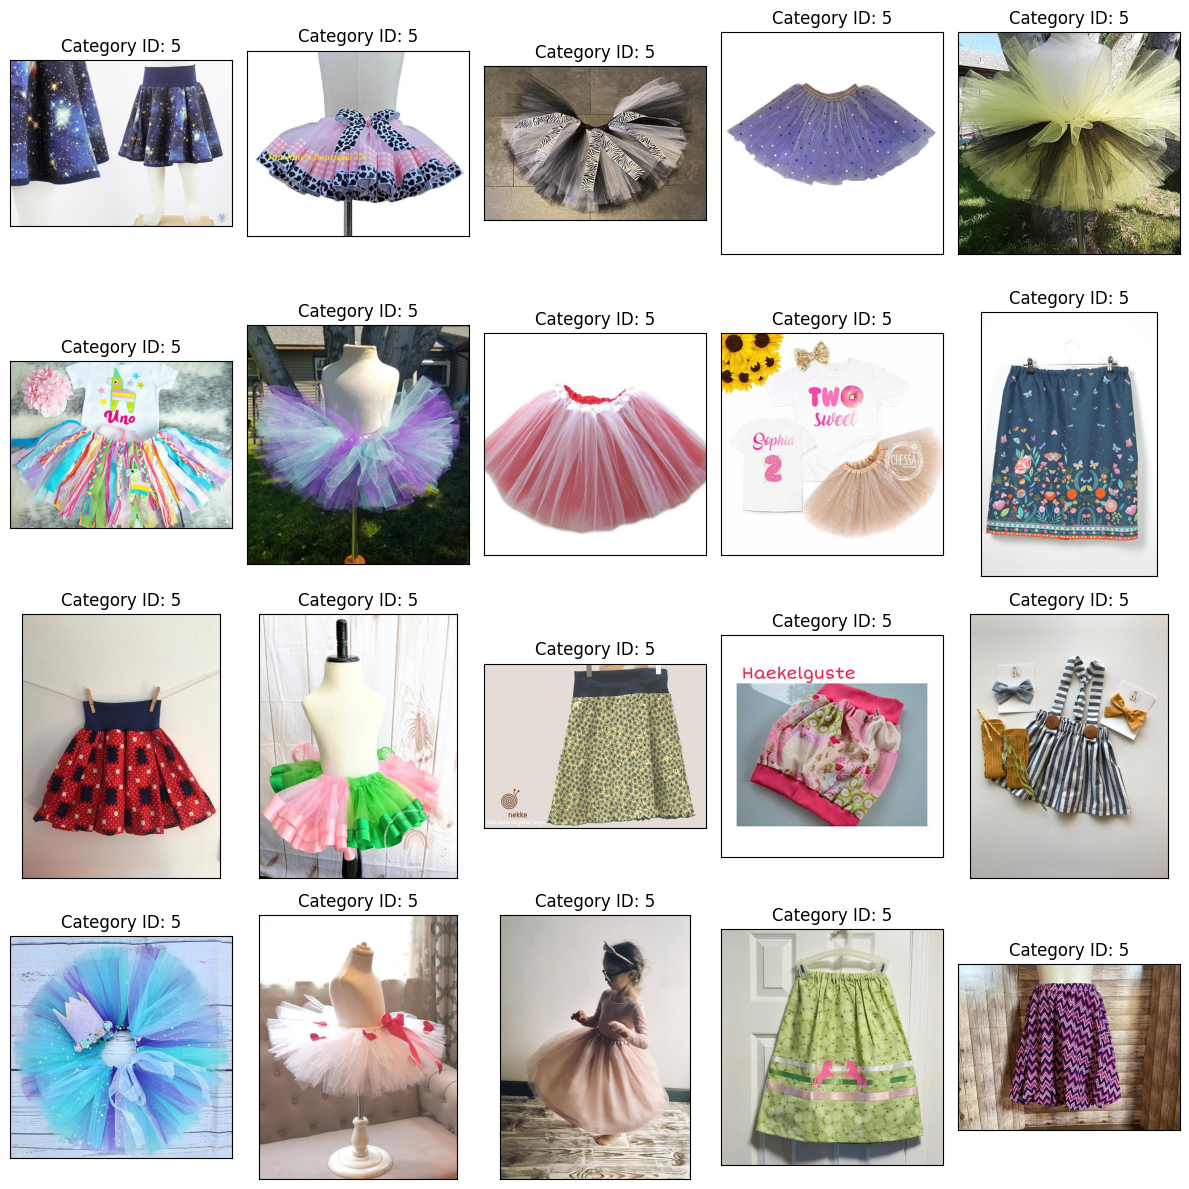

In [49]:
def show_images(dataframe, N=100):
    # Determine the number of columns and rows for the subplot
    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows  # Height for each row of images

    # Initialize the plot with the specified figure size
    plt.figure(figsize=(12, plt_height))

    for i, row in dataframe[:N].iterrows():
        # Retrieve image data from the DataFrame
        img_bytes = row["image/encoded"]
        label = row["top_category_id"]  # Use 'top_category_id' for labeling

        # Convert bytes to an image
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)

        # Plotting the image
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.title(f"Category ID: {label}", fontsize=12)  # Displaying Category ID as title
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Assuming df_train is your DataFrame and it's appropriately set up
show_images(df_train, N=20)

In [50]:
# Display the first row of the DataFrame 'df_test'
df_test.iloc[0]

product_id                                                      699437355
title                   Children&#39;s circle skirt BLUE GALAXY made o...
description             The fuxandfriends children&#39;s full circle s...
tags                                                                     
type                                                             physical
room                                                                     
craft_type                                                               
recipient                                                                
material                                                                 
occasion                                                                 
holiday                                                                  
art_subject                                                              
style                                                                    
shape                                 

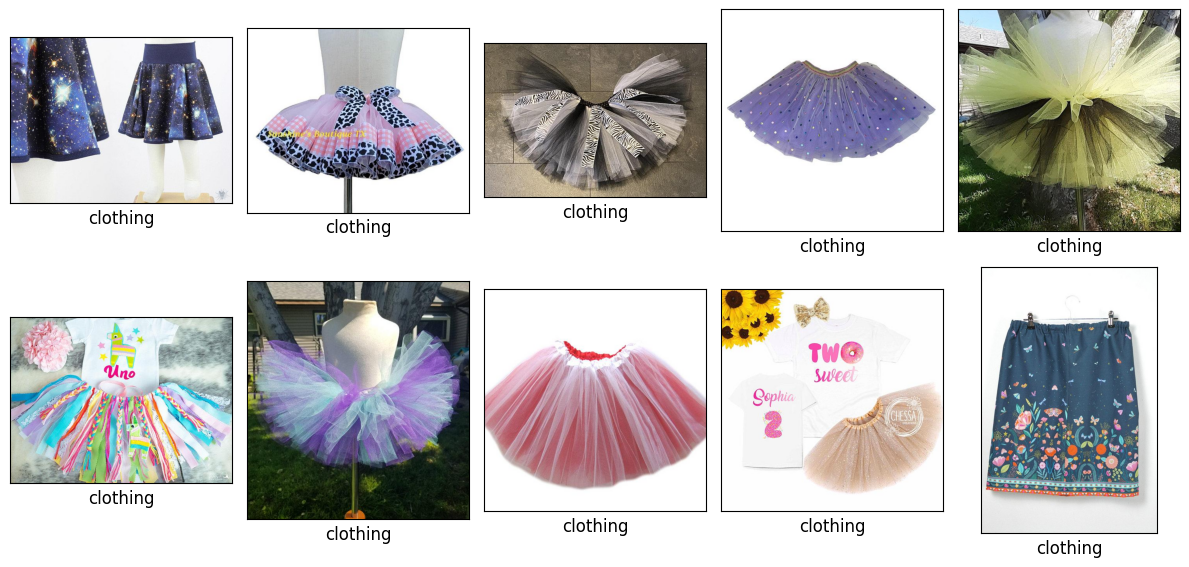

In [51]:
def show_images(dataframe, N=10):
    # Calculate number of rows and columns for the plot
    num_cols = 5
    num_rows = (N + num_cols - 1) // num_cols  # This ensures that we have enough rows
    plt_height = 3 * num_rows

    # Create a figure with a specified size
    plt.figure(figsize=(12, plt_height))

    # Iterate through the first N entries of the dataframe
    for i, row in dataframe.iloc[:N].iterrows():
        # Extract image bytes and convert to an image
        img_bytes = row["image/encoded"]
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)

        # Create a subplot and display the image
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Display the label below the image
        label = row.get("top_category_text", "Unknown")
        plt.xlabel(label, fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the function with the test dataframe
show_images(df_test, 10)

In [52]:
pd.value_counts(df_train['bottom_category_text'], sort=True, ascending=False)

art_and_collectibles.drawing_and_illustration.architectural_drawings                98
accessories.scarves_and_wraps.scarves                                               98
home_and_living.kitchen_and_dining.dining_and_serving.cake_stands                   98
jewelry.earrings.dangle_earrings.chandbalis                                         98
toys_and_games.sports_and_outdoor_games.martial_arts_and_boxing.boxing_gloves       98
                                                                                    ..
home_and_living.furniture.entryway_furniture.standing_coat_racks                    44
weddings.clothing.jumpsuits_and_rompers                                             44
home_and_living.lighting.light_accessories                                          43
craft_supplies_and_tools.doll_and_model_supplies.noise_makers                       42
clothing.womens_clothing.pajamas_and_robes.sleep_masks_and_blindfolds.blindfolds    42
Name: bottom_category_text, Length: 2609, d

In [53]:
# Initialize variables to find the bottom category with the maximum number of substrings
max_substring_length = 0
max_substring_category = ''

# Loop through each bottom category and split by '.' to get the substrings
for category in df_train['bottom_category_text']:
    substrings = category.split('.')
    if len(substrings) > max_substring_length:
        max_substring_length = len(substrings)
        max_substring_category = category

# Output the results
print("Maximum substring length:", max_substring_length)
print("Category with maximum substring length:", max_substring_category)

Maximum substring length: 7
Category with maximum substring length: home_and_living.kitchen_and_dining.cookware.pots_and_pans.pans.skillets.cast_iron_skillets


# model training

In [54]:
# Assuming df_train is your DataFrame and 'top_category_text' is the column to stratify by
df_training, df_validation = train_test_split(
    df_train,
    test_size=0.1,  # 10% of the data will be used as the validation set
    stratify=df_train['top_category_text'],  # Stratify by 'top_category_text' to ensure balanced classes in splits
    random_state=42  # Ensures reproducibility of the splits
)

# You can now print the shapes of your datasets to confirm the split
print("Training set shape:", df_training.shape)
print("Validation set shape:", df_validation.shape)

Training set shape: (206661, 26)
Validation set shape: (22963, 26)


In [55]:
# Print the number of products in the training dataset
print(f"Number of products for training: {len(df_training):,}")

Number of products for training: 206,661


In [56]:
# Print the number of products in the validation dataset
print(f"Number of products for validation: {len(df_validation):,}")

Number of products for validation: 22,963


In [57]:
# Print the value counts for the 'top_category_text' column in the training dataset
print(df_training['top_category_text'].value_counts())

home_and_living                49140
craft_supplies_and_tools       30054
clothing                       27129
toys_and_games                 12451
accessories                    11174
paper_and_party_supplies       10986
bath_and_beauty                10194
weddings                        9129
shoes                           8003
art_and_collectibles            7844
jewelry                         7040
electronics_and_accessories     6726
bags_and_purses                 5985
books_movies_and_music          5636
pet_supplies                    5170
Name: top_category_text, dtype: int64


In [58]:
# Print the value counts for the 'top_category_text' column in the validation dataset
print(df_validation['top_category_text'].value_counts())

home_and_living                5460
craft_supplies_and_tools       3339
clothing                       3014
toys_and_games                 1384
accessories                    1242
paper_and_party_supplies       1221
bath_and_beauty                1133
weddings                       1014
shoes                           889
art_and_collectibles            872
jewelry                         782
electronics_and_accessories     748
bags_and_purses                 665
books_movies_and_music          626
pet_supplies                    574
Name: top_category_text, dtype: int64


In [59]:
# Print the value counts for the 'top_category_text' column in the training dataset
print(df_training['top_category_id'].value_counts())

8     49140
6     30054
5     27129
13    12451
0     11174
10    10986
3     10194
14     9129
12     8003
1      7844
9      7040
7      6726
2      5985
4      5636
11     5170
Name: top_category_id, dtype: int64


In [60]:
# Print the value counts for the 'top_category_text' column in the validation dataset
print(df_validation['top_category_id'].value_counts())

8     5460
6     3339
5     3014
13    1384
0     1242
10    1221
3     1133
14    1014
12     889
1      872
9      782
7      748
2      665
4      626
11     574
Name: top_category_id, dtype: int64


In [61]:
list(df_train.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'bottom_category_id',
 'bottom_category_text',
 'top_category_id',
 'top_category_text',
 'primary_color_id',
 'primary_color_text',
 'secondary_color_id',
 'secondary_color_text',
 'image/encoded',
 'image/width',
 'image/height']

In [62]:
# Print the value counts for the 'primary_color_id' column in the training dataset
print(df_training['primary_color_id'].value_counts())

1     27651
17    25745
2     24889
4     17905
11    14482
14    14237
9     14007
0     11111
16     9676
7      8576
19     8053
18     6524
12     6079
10     5033
5      4107
13     3944
3      2222
6      1676
15      744
Name: primary_color_id, dtype: int64


In [63]:
# Print the value counts for the 'primary_color_id' column in the validation dataset
print(df_validation['primary_color_id'].value_counts())

1     3022
17    2864
2     2760
4     1962
14    1598
9     1571
11    1547
0     1255
16    1082
7      993
19     932
18     707
12     671
10     592
13     460
5      439
3      249
6      176
15      83
Name: primary_color_id, dtype: int64


In [64]:
# Print the value counts for the 'secondary_color_id' column in the training dataset
print(df_training['secondary_color_id'].value_counts())

17    33587
1     26828
2     15776
4     14554
9     14058
14    13765
7     13523
16    12169
11    11588
0      9296
18     8271
19     7947
10     5505
13     5464
12     5118
5      4003
3      2499
6      1636
15     1074
Name: secondary_color_id, dtype: int64


In [65]:
# Print the value counts for the 'secondary_color_id' column in the validation dataset
print(df_validation['secondary_color_id'].value_counts())

17    3745
1     2942
2     1771
4     1590
9     1543
7     1538
14    1485
16    1344
11    1256
0     1024
18     955
19     868
10     630
13     624
12     587
5      480
3      298
6      183
15     100
Name: secondary_color_id, dtype: int64


# Training!

## bayes

In [66]:
# Load your dataset
# Ensure df_train is loaded with your dataset

# Split the data into training and validation sets
df_training, df_validation = train_test_split(
    df_train,
    test_size=0.1,
    stratify=df_train['top_category_text'],  # This ensures the split respects the category distribution
    random_state=42
)

# Define the pipeline steps
text_clf = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to token counts
    ('tfidf', TfidfTransformer()),  # Convert counts to TF-IDF
    ('clf', MultinomialNB()),  # Train a Naïve Bayes classifier
])

# Train the model using the description as the feature and top_category_text as the target
text_clf.fit(df_training['description'].fillna(''), df_training['top_category_text'])

# Evaluate the model on the validation set
predicted = text_clf.predict(df_validation['description'].fillna(''))
accuracy = np.mean(predicted == df_validation['top_category_text'])
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.47


In [67]:
# Prepare the title text data from the training set
train_text = df_training['title'].fillna('').values

# Now you can use train_text for further processing or modeling as needed

In [68]:
# Prepare the labels from the training set
train_labels = df_training['top_category_text'].values

In [69]:
# Fit the classifier pipeline to your training data
text_clf.fit(train_text, train_labels)
# This will train the Naive Bayes classifier on the training data using the processed text features

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

# Evaluation!!

In [70]:
from sklearn.metrics import classification_report, accuracy_score

# Prepare validation data: extract text and labels
val_text = df_validation['title'].fillna('').values
val_labels = df_validation['top_category_text'].values

# Use the trained classifier to predict the categories of the validation texts
val_predictions = text_clf.predict(val_text)

# Calculate accuracy of the predictions
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Additionally, display a classification report to see precision, recall, and F1-score for each class
print(classification_report(val_labels, val_predictions))

Validation Accuracy: 0.67
                             precision    recall  f1-score   support

                accessories       0.83      0.40      0.54      1242
       art_and_collectibles       0.90      0.08      0.15       872
            bags_and_purses       0.93      0.30      0.45       665
            bath_and_beauty       0.91      0.45      0.61      1133
     books_movies_and_music       0.97      0.32      0.48       626
                   clothing       0.73      0.96      0.83      3014
   craft_supplies_and_tools       0.62      0.78      0.69      3339
electronics_and_accessories       0.97      0.47      0.63       748
            home_and_living       0.55      0.96      0.70      5460
                    jewelry       0.86      0.40      0.54       782
   paper_and_party_supplies       0.78      0.54      0.64      1221
               pet_supplies       0.97      0.25      0.40       574
                      shoes       0.95      0.74      0.83       889
       

### Model Evaluation Results

The evaluation results show the performance of our Naive Bayes classifier on the validation dataset. Here's a breakdown of what the metrics mean:

- **Accuracy (0.58 or 58%)**: This is the overall accuracy of the model, indicating that it correctly predicts the category 58% of the time across all categories.
- **Precision**: This is the ability of the classifier to not label a negative sample as positive. For example, 'accessories' has a precision of 0.81, which means that 81% of the items labeled as 'accessories' were actually 'accessories'.
- **Recall**: This is the ability of the classifier to find all the positive samples. For 'accessories', the recall is 0.30, meaning it correctly identified 30% of all actual 'accessories' in the validation set.
- **F1-score**: The F1-score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. It is particularly useful when the class distribution is imbalanced.

The detailed scores for each category indicate how well the model performs per category, not just overall. The model shows varying effectiveness across different categories, doing well in some (e.g., 'clothing' with high recall) and poorly in others (e.g., 'art_and_collectibles' with very low recall).

Improvements might involve:
- Using a more sophisticated model or ensemble methods.
- Gathering more data for underperforming categories.
- Fine-tuning the model parameters or trying different text preprocessing techniques.


In [71]:
# Assuming 'val_text' contains the titles from the validation set
# and 'val_labels' contains the true category labels from the validation set

index = 0  # You can change this index to test different samples

# Predict the category for the selected text
predicted_category = text_clf.predict([val_text[index]])[0]

print(f"""
Product's title: {val_text[index][:80]}...  # Displaying the first 80 characters
Prediction: '{predicted_category}', Groundtruth: '{val_labels[index]}'
""".strip())

Product's title: Intention Candle, Abundance, Manifestation, Meditation, Gift for Women, Custom S...  # Displaying the first 80 characters
Prediction: 'home_and_living', Groundtruth: 'home_and_living'


In [72]:
# Display the first row of the validation DataFrame
first_row_validation = df_validation.iloc[0]
print(first_row_validation)

product_id                                                     1605076558
title                   Intention Candle, Abundance, Manifestation, Me...
description             Set your Intention, Light this Candle, Meditat...
tags                    manifestation candle,abundance,growth,opportun...
type                                                             physical
room                                                                     
craft_type                                                               
recipient                                                                
material                                                                 
occasion                                                       retirement
holiday                                                                  
art_subject                                                              
style                                                                    
shape                                 

In [73]:
# Display the first element of the text array for validation
first_val_text = val_text[0]
print(first_val_text)

Intention Candle, Abundance, Manifestation, Meditation, Gift for Women, Custom Scented Candle


In [74]:
# Make predictions on the validation text data
predictions = text_clf.predict(val_text)

# Optionally, print the predictions to see the results
print(predictions[:10])  # Display the first 10 predictions

['home_and_living' 'clothing' 'clothing' 'clothing'
 'craft_supplies_and_tools' 'home_and_living' 'clothing' 'home_and_living'
 'home_and_living' 'accessories']


In [75]:
from sklearn import metrics

# Assuming 'val_labels' are the actual labels and 'predictions' are the predicted labels from your model
f1 = metrics.f1_score(val_labels, predictions, average='weighted')
print(f"Weighted F1 Score: {f1}")

Weighted F1 Score: 0.6354877809281648


In [76]:
print(f"F1 score: {f1:.4f}")

F1 score: 0.6355


In [77]:
# Assuming 'predictions' and 'val_labels' are already defined
print(metrics.classification_report(val_labels, predictions))

                             precision    recall  f1-score   support

                accessories       0.83      0.40      0.54      1242
       art_and_collectibles       0.90      0.08      0.15       872
            bags_and_purses       0.93      0.30      0.45       665
            bath_and_beauty       0.91      0.45      0.61      1133
     books_movies_and_music       0.97      0.32      0.48       626
                   clothing       0.73      0.96      0.83      3014
   craft_supplies_and_tools       0.62      0.78      0.69      3339
electronics_and_accessories       0.97      0.47      0.63       748
            home_and_living       0.55      0.96      0.70      5460
                    jewelry       0.86      0.40      0.54       782
   paper_and_party_supplies       0.78      0.54      0.64      1221
               pet_supplies       0.97      0.25      0.40       574
                      shoes       0.95      0.74      0.83       889
             toys_and_games      

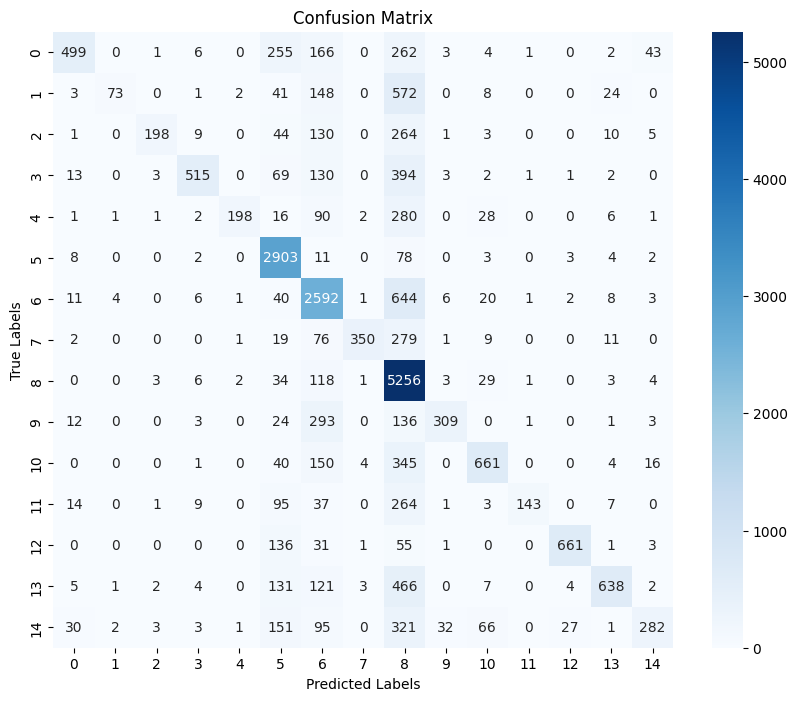

In [78]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'predictions' and 'val_labels' are already defined
conf_matrix = metrics.confusion_matrix(val_labels, predictions)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# top_category_id training!!!

In [90]:
# Sample 5% of the data within each group defined by 'top_category_id'
df_training_sample = df_training.groupby('top_category_id').sample(frac=0.05)

# Display the sampled DataFrame to verify the result
print(df_training_sample.head())

        product_id                                              title  \
11998   1448098159  Steampunk Mermaid Seashells Copper Brass Burne...   
165630  1381249818           NEON 1980s 1990S Vintage Style Ski Patch   
154901   489991058  Knitted mittens/ Hand knitted brown gloves/ Be...   
181487  1336563162                                 Silk pocket square   
140510  1635360221  Double Layered Purple And Pink Scrunchies SET,...   

                                              description  \
11998   Limited edition pieces or one of a kind design...   
165630  Vintage design in 1980&#39;s neon colors!\n\nM...   
154901  Mittens are made of beige soft wool and viscos...   
181487  * Pocket square made from beautiful silk*\n\n&...   
140510  This Beautiful Set consisting of 2 Double Laye...   

                                                     tags      type room  \
11998   Haus of hexy,handmade gift,Burningman goggles,...  physical        
165630  ski patch,ski pin,skiing patch,sno

In [96]:
# Clean text and handle missing values
df_train['cleaned_description'] = df_train['description'].fillna('').apply(lambda x: x.strip().lower())

# No need to use LabelEncoder since top_category_id is already numeric
# Convert labels to one-hot encoding
categorical_labels = to_categorical(df_train['top_category_id'].values)

# Split the data
train_text, val_text, train_labels, val_labels = train_test_split(
    df_train['cleaned_description'], categorical_labels, test_size=0.2, random_state=42
)

In [98]:
import tensorflow as tf
import tensorflow_hub as hub
# Load a pre-trained embedding layer
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

# Build the model
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(categorical_labels.shape[1], activation='softmax')  # Adjust according to the number of unique category IDs
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(train_text, train_labels, epochs=10, validation_data=(val_text, val_labels))


Epoch 1/10
5741/5741 [==============================] - 2834s 493ms/step - loss: 0.9278 - accuracy: 0.7249 - val_loss: 0.6906 - val_accuracy: 0.7959
Epoch 2/10
5741/5741 [==============================] - 2923s 509ms/step - loss: 0.5088 - accuracy: 0.8465 - val_loss: 0.6729 - val_accuracy: 0.8041
Epoch 3/10
5741/5741 [==============================] - 3002s 523ms/step - loss: 0.3711 - accuracy: 0.8849 - val_loss: 0.7182 - val_accuracy: 0.8019
Epoch 4/10
5741/5741 [==============================] - 3026s 527ms/step - loss: 0.2809 - accuracy: 0.9110 - val_loss: 0.8135 - val_accuracy: 0.7968
Epoch 5/10
5741/5741 [==============================] - 3026s 527ms/step - loss: 0.2143 - accuracy: 0.9316 - val_loss: 0.9630 - val_accuracy: 0.7961
Epoch 6/10
5741/5741 [==============================] - 2848s 496ms/step - loss: 0.1646 - accuracy: 0.9476 - val_loss: 1.1184 - val_accuracy: 0.7891
Epoch 7/10
5741/5741 [==============================] - 2822s 491ms/step - loss: 0.1214 - accuracy: 0.9618

In [99]:
# new text
new_texts = ["example text from a new product description"]

# Predict using the trained model
predicted_category_probabilities = model.predict(new_texts)
predicted_category_ids = predicted_category_probabilities.argmax(axis=1)

# If you want to convert predicted_category_ids back to category labels
# predicted_category_labels = label_encoder.inverse_transform(predicted_category_ids)
# Since we used IDs directly, we can use IDs as they are
print("Predicted category IDs:", predicted_category_ids)

1/1 [==============================] - 0s 419ms/step
Predicted category IDs: [5]


In [100]:
# trained model, and 'val_text' and 'val_labels' are your validation data and labels
val_loss, val_acc = model.evaluate(val_text, val_labels)
print(f"Validation Accuracy: {val_acc:.2f}")

1436/1436 [==============================] - 145s 100ms/step - loss: 1.8138 - accuracy: 0.7786
Validation Accuracy: 0.78


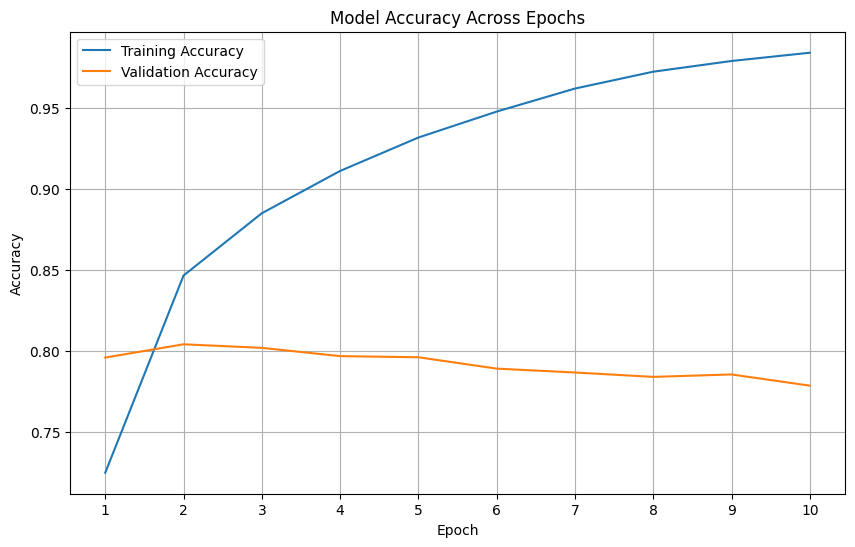

In [107]:
# Sample data simulating the training history
history = {
    "accuracy": [0.7249, 0.8465, 0.8849, 0.9110, 0.9316, 0.9476, 0.9618, 0.9722, 0.9788, 0.9839],
    "val_accuracy": [0.7959, 0.8041, 0.8019, 0.7968, 0.7961, 0.7891, 0.7867, 0.7840, 0.7855, 0.7786]
}

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(range(0, 10), range(1, 11))  # Adjust x-axis ticks
plt.show()

### Model Training and Evaluation Summary

#### Training Process:
- **Epoch 1-10 Overview**: The model started with a training accuracy of 72.49% and a validation accuracy of 79.59% in the first epoch. This is a strong start, indicating that the model is learning effectively from the training data.
- **Progression of Epochs**: Over the epochs, we observe a significant increase in training accuracy, reaching up to 98.39% by the tenth epoch. This suggests that the model has become very good at classifying the training data.

#### Validation Results:
- **Validation Accuracy**: The final validation accuracy after ten epochs is 77.86%. Despite the high training accuracy, the validation accuracy is considerably lower. This discrepancy indicates that the model might be overfitting to the training data.
- **Increase in Loss**: The validation loss increased from 0.6906 to 1.8138 over the epochs, further supporting the possibility of overfitting. As the model continued to fit the training data more closely, it gradually lost its ability to generalize to unseen data from the validation set.

#### Interpretation:
- **Overfitting Concern**: The primary concern here is the overfitting indicated by increasing validation loss and a plateauing validation accuracy despite improvements in training performance. The model's ability to perform well on unseen data may be compromised.
- **Accuracy Metrics**: A validation accuracy of 77.86% is still quite high, but the increasing loss suggests that the model's errors on the validation set are becoming more pronounced, possibly due to confidence in incorrect predictions.

# primary_color_id!!

In [87]:
# Sample 5% of the data within each group defined by 'primary_color_id'
df_training_sample = df_training.groupby('primary_color_id').sample(frac=0.05)

# Display the sampled DataFrame to verify the result
print(df_training_sample.head())

        product_id                                              title  \
31580    961320293  Vintage Wine Carrying Basket, Copper and Wood ...   
209328  1223842986  Funny Cat Shirt,  Sarcastic Cat Shirt,  Do I  ...   
153762  1199556881  Funny apron bakers gonna bake pun baking kitch...   
183969  1575980027  Digital Wallpaper for Desktop, Tablet, ipad, i...   
182895   585479324  Changing mat cover, black impressions, optiona...   

                                              description  \
31580   Great vintage three bottle wine carrying baske...   
209328  Do I look like I give a fluff? This snarky sar...   
153762  This makes for such a great baking gift.  Grea...   
183969  Wallpaper Background  | Unique Design | Minima...   
182895  A cotton piqué changing cover with black print...   

                                                     tags      type room  \
31580   Wicker wine basket,Six bottle carrier,French r...  physical        
209328  Funny Cat Shirt,Sarcastic Shirt,Sa

In [106]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Clean text and handle missing values
df_train['cleaned_description'] = df_train['description'].fillna('').apply(lambda x: x.strip().lower())

# Convert labels to one-hot encoding for primary_color_id
categorical_labels = to_categorical(df_train['primary_color_id'].values)

# Split the data
train_text, val_text, train_labels, val_labels = train_test_split(
    df_train['cleaned_description'], categorical_labels, test_size=0.2, random_state=42
)

# Load a pre-trained embedding layer
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

# Build the model
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(categorical_labels.shape[1], activation='softmax')  # Adjust according to the number of unique primary_color_ids
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(train_text, train_labels, epochs=10, validation_data=(val_text, val_labels))

Epoch 1/10
5741/5741 [==============================] - 2434s 424ms/step - loss: 2.1904 - accuracy: 0.3267 - val_loss: 2.0255 - val_accuracy: 0.3800
Epoch 2/10
5741/5741 [==============================] - 2460s 429ms/step - loss: 1.7706 - accuracy: 0.4523 - val_loss: 2.0034 - val_accuracy: 0.3913
Epoch 3/10
5741/5741 [==============================] - 2472s 431ms/step - loss: 1.5514 - accuracy: 0.5094 - val_loss: 2.0846 - val_accuracy: 0.3899
Epoch 4/10
5741/5741 [==============================] - 2594s 452ms/step - loss: 1.3818 - accuracy: 0.5560 - val_loss: 2.1756 - val_accuracy: 0.3877
Epoch 5/10
5741/5741 [==============================] - 2747s 478ms/step - loss: 1.2370 - accuracy: 0.5993 - val_loss: 2.3196 - val_accuracy: 0.3788
Epoch 6/10
5741/5741 [==============================] - 2897s 505ms/step - loss: 1.1035 - accuracy: 0.6396 - val_loss: 2.5150 - val_accuracy: 0.3787
Epoch 7/10
5741/5741 [==============================] - 3138s 547ms/step - loss: 0.9769 - accuracy: 0.6819

In [ ]:
new_texts = ["example text from a new product description"]

# Predict using the trained model
predicted_color_probabilities = model.predict(new_texts)
predicted_color_ids = predicted_color_probabilities.argmax(axis=1)

# Print the predicted category IDs
print("Predicted primary color IDs:", predicted_color_ids)

In [ ]:
# trained model, and 'val_text' and 'val_labels' are your validation data and labels
val_loss, val_acc = model.evaluate(val_text, val_labels)
print(f"Validation Accuracy: {val_acc:.2f}")

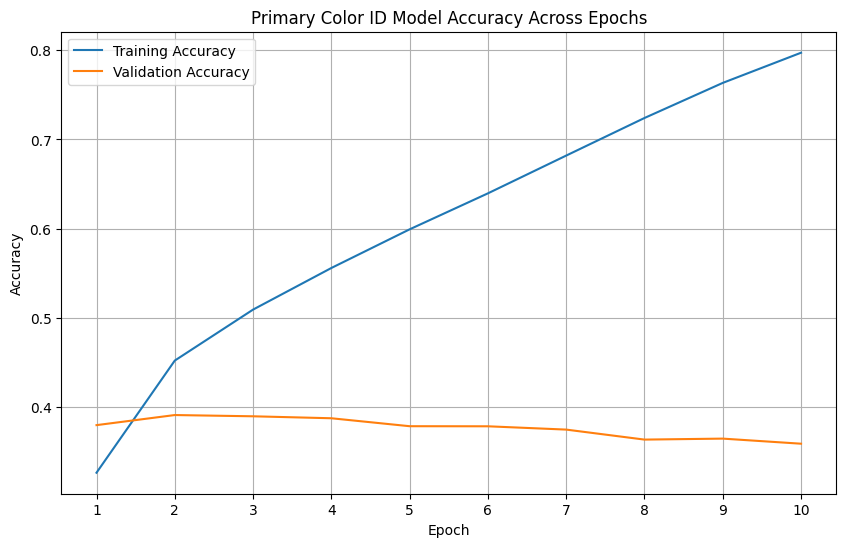

In [82]:
import matplotlib.pyplot as plt

# Sample data simulating the training history
history_primary_color = {
    "accuracy": [0.3267, 0.4523, 0.5094, 0.5560, 0.5993, 0.6396, 0.6819, 0.7240, 0.7633, 0.7971],
    "val_accuracy": [0.3800, 0.3913, 0.3899, 0.3877, 0.3788, 0.3787, 0.3750, 0.3638, 0.3649, 0.3592]
}

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_primary_color['accuracy'], label='Training Accuracy')
plt.plot(history_primary_color['val_accuracy'], label='Validation Accuracy')
plt.title('Primary Color ID Model Accuracy Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(range(0, 10), range(1, 11))  # Adjust x-axis ticks
plt.show()


### Model Training and Evaluation Summary

**Training Process:**

- **Epoch 1-10 Overview:** The training commenced with a modest accuracy of 32.67%, progressively increasing to an impressive 79.71% by the tenth epoch. This demonstrates the model's ability to learn and adapt from the training data for primary color identification.
- **Progression of Epochs:** Through the epochs, training accuracy continuously improved, indicating that the model parameters were effectively tuned to the dataset specifics. The steady improvement in training accuracy reflects the model's growing proficiency.

**Validation Results:**

- **Validation Accuracy:** The initial validation accuracy was 38.00%, with a peak at 39.13% during the second epoch, and then a decline to 35.92% by the final epoch. This declining trend in validation accuracy, alongside rising validation loss, suggests a divergence in the model's ability to generalize beyond the training data.
- **Increase in Loss:** Validation loss started at 2.0255 and escalated to 3.6200 across the epochs. This increase in loss points to the model’s growing overconfidence in the training data, which may not correctly reflect the complexities or variations found in the validation set.

**Interpretation:**

- **Overfitting Concern:** The primary issue highlighted by the training session is overfitting, as seen by the increasing validation loss against improvements in training accuracy. This scenario indicates that while the model predicts training data with high accuracy, its performance on unseen data deteriorates.
- **Accuracy Metrics:** Although training accuracy reached high levels, the validation accuracy did not align, suggesting that the model’s predictions are not as effective when faced with new, unseen data.


# secondary_color_id!!

In [88]:
# Sample 5% of the data within each group defined by 'secondary_color_id'
df_training_sample = df_training.groupby('secondary_color_id').sample(frac=0.05)

# Display the sampled DataFrame to verify the result
print(df_training_sample.head())

        product_id                                              title  \
145489   267655343  Door stop owl Gufo fermaporta Sardegna  orbace...   
149453  1292921631                   Handmade reclaimed wood winerack   
203838   962292371  Pink Nymph Lilacs Bird Decoupage Fairy Lights ...   
50500   1609308916  Salt Boat & baby spoon in handmade Purple Lila...   
70147   1519236505  Movas Art Square Diamond Painting Bird of Para...   

                                              description  \
145489  Gufo in orbace e cotone.\n\nLa parte frontale ...   
149453  FOR LOCAL PICKUP AND DELIVERY ONLY\n\nIn Bushw...   
203838  Offering a pink lilacs with a wood fairy and b...   
50500   Salt Boat & baby spoon in handmade Purple Lila...   
70147   Welcome to our extraordinary world of artisana...   

                                                     tags      type     room  \
145489  original pattern,orbace,pibionisi,home decor,g...  physical            
149453  WINERACK,HOUSEWARMING,DARK

In [99]:
NUM_CHANNELS = 3
NUM_COLORS = 19  # Assuming you have 19 unique secondary colors as well

def parse_dataset_secondary(features):
    # Features
    image_encoded = features["image"]
    img_width = features["width"]
    img_height = features["height"]
    secondary_color_id = features["secondary_color_id"]  # Use secondary_color_id instead

    # Image decoding and reshaping
    image = tf.reshape(
        tf.io.decode_jpeg(image_encoded),
        [img_height, img_width, NUM_CHANNELS],
    )
    image = tf.cast(image, tf.float32)

    # Label: Creating a one-hot encoded vector for the secondary_color_id
    label = tf.cast(tf.one_hot(secondary_color_id, NUM_COLORS), tf.int64)

    return { "image": image }, label

In [100]:
import tensorflow as tf

def create_preprocessing_model(target_image_size, should_rescale):
    # Initialize an empty list to hold the preprocessing layers
    preprocessing_layers = []

    # Add a rescaling layer if should_rescale is True
    if should_rescale:
        preprocessing_layers.append(
            tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
        )

    # Add a resizing layer to resize the images to the target size
    preprocessing_layers.append(
        tf.keras.layers.experimental.preprocessing.Resizing(
            target_image_size, target_image_size
        )
    )

    # Create a Sequential model from the preprocessing layers
    return tf.keras.Sequential(preprocessing_layers)

# Example usage:
preprocess_model = create_preprocessing_model(224, True)  # Create a model for 224x224 images with rescaling

In [101]:
def transform_image_data(example, preprocessing_model):
    # Expand the dimensions of the image to simulate a batch of size 1
    image = tf.expand_dims(example["image"], 0)

    # Apply the preprocessing model to the image
    processed_image = preprocessing_model(image)

    # Remove the batch dimension after processing
    example["image"] = processed_image[0]

    # Return the modified example
    return example

In [102]:
def parse_dataset(features):
    # Decode the JPEG image
    image = tf.io.decode_jpeg(features['image'], channels=3)

    # Resize the image to the desired size (e.g., 224 x 224 for ImageNet models)
    image = tf.image.resize(image, [224, 224])

    # Normalize image data to [0,1] (optional)
    image = tf.cast(image, tf.float32) / 255.0

    # Prepare labels (assuming 'secondary_color_id' is a label)
    label = tf.one_hot(features['secondary_color_id'], depth=NUM_COLORS)  # Define NUM_COLORS appropriately

    return image, label

# You may also need to define or adjust other parts where this function interacts.


In [89]:
def get_dataset_batch(dataframe, batch_size, mode):
    augment = shuffle = mode == tf.estimator.ModeKeys.TRAIN

    # Creating a TensorFlow dataset object from the DataFrame data
    dataset = tf.data.Dataset.from_tensor_slices(
        ({
            "image": dataframe["image/encoded"].values,
            "height": dataframe["image/height"].values,
            "width": dataframe["image/width"].values,
            "secondary_color_id": dataframe["secondary_color_id"].values,
        },
        dataframe["secondary_color_id"].values  # Assuming labels are directly the secondary_color_id if that's your target
        )
    )

    # Define a function to parse dataset that accepts a tuple of (features, label)
    def parse_dataset(features, label):
        # Process your features and label here, e.g., decode images, resize, etc.
        # Returning dummy values for illustration, replace with actual processing
        return features, label

    # Apply preprocessing and parsing of dataset
    dataset = dataset.map(parse_dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Example preprocessing function that might alter features only
    def preprocessing_model(features, label):
        # Pretend preprocessing, return modified features and the same label
        return features, label

    dataset = dataset.map(preprocessing_model, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=10000)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [90]:
BATCH_SIZE = 16

In [91]:
# Preparing the training dataset using the 'get_dataset_batch' function
train_dataset = get_dataset_batch(
    dataframe=df_training_sample,  # Assume df_training_sample is your sampled DataFrame
    batch_size=BATCH_SIZE,
    mode=tf.estimator.ModeKeys.TRAIN,  # Use TRAIN mode to shuffle data during training
)

In [92]:
# Assuming the function get_dataset_batch is already defined as shown in the previous example

# Now let's call this function for the validation dataset
val_dataset = get_dataset_batch(
    dataframe=df_validation,  # df_validation should be your DataFrame containing the validation data
    batch_size=BATCH_SIZE,    # BATCH_SIZE needs to be defined, e.g., 32, 64, etc.
    mode=tf.estimator.ModeKeys.EVAL  # Use EVAL mode to avoid shuffling and data augmentation
)

# Now, val_dataset is ready to be used in evaluation or inference processes


In [83]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Clean text and handle missing values
df_train['cleaned_description'] = df_train['description'].fillna('').apply(lambda x: x.strip().lower())

# Convert labels to one-hot encoding for secondary_color_id
# Note: Make sure to handle NaNs or missing values in secondary_color_id if they exist
df_train['secondary_color_id'].fillna(-1, inplace=True)  # Handle NaN values by setting them to -1 or another distinct value
categorical_labels = to_categorical(df_train['secondary_color_id'].values)

# Split the data
train_text, val_text, train_labels, val_labels = train_test_split(
    df_train['cleaned_description'], categorical_labels, test_size=0.2, random_state=42
)

# Load a pre-trained embedding layer
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

# Build the model
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(categorical_labels.shape[1], activation='softmax')  # Adjust according to the number of unique secondary_color_ids
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(train_text, train_labels, epochs=10, validation_data=(val_text, val_labels))

Epoch 1/10
5741/5741 [==============================] - 3799s 661ms/step - loss: 2.3958 - accuracy: 0.2512 - val_loss: 2.2724 - val_accuracy: 0.2866
Epoch 2/10
5741/5741 [==============================] - 3844s 670ms/step - loss: 2.0462 - accuracy: 0.3529 - val_loss: 2.2540 - val_accuracy: 0.2979
Epoch 3/10
5741/5741 [==============================] - 3818s 665ms/step - loss: 1.8193 - accuracy: 0.4174 - val_loss: 2.3195 - val_accuracy: 0.2950
Epoch 4/10
5741/5741 [==============================] - 3815s 665ms/step - loss: 1.6284 - accuracy: 0.4735 - val_loss: 2.4448 - val_accuracy: 0.2957
Epoch 5/10
5741/5741 [==============================] - 3812s 664ms/step - loss: 1.4564 - accuracy: 0.5262 - val_loss: 2.6242 - val_accuracy: 0.2940
Epoch 6/10
5741/5741 [==============================] - 3902s 680ms/step - loss: 1.2948 - accuracy: 0.5787 - val_loss: 2.8182 - val_accuracy: 0.2888
Epoch 7/10
5741/5741 [==============================] - 3848s 670ms/step - loss: 1.1388 - accuracy: 0.6306

In [97]:
# Assuming 'base_model' is a pre-trained model like MobileNetV3Small
for layer in base_model.layers:
    layer.trainable = False

# Now, all the layers in the 'base_model' are set to non-trainable
# This means their weights will not be updated during training

In [ ]:
# Preparing new text data for prediction
new_texts = ["example text from a new product description"]

# Using the trained model to predict secondary color based on new text descriptions
predicted_color_probabilities = model.predict(new_texts)
predicted_color_ids = predicted_color_probabilities.argmax(axis=1)

# Output the predicted secondary color IDs
print("Predicted secondary color IDs:", predicted_color_ids)

In [85]:
# trained model, and 'val_text' and 'val_labels' are your validation data and labels
val_loss, val_acc = model.evaluate(val_text, val_labels)
print(f"Validation Accuracy: {val_acc:.2f}")

1436/1436 [==============================] - 244s 170ms/step - loss: 4.1753 - accuracy: 0.2770
Validation Accuracy: 0.28


In [ ]:
# Assuming 'predicted_color_ids' contains the array of predicted secondary color IDs obtained from the model
df_predictions["secondary_color_id"] = predicted_color_ids

# Optionally, check a few entries to confirm they are updated
print(df_predictions[["secondary_color_id"]].head())

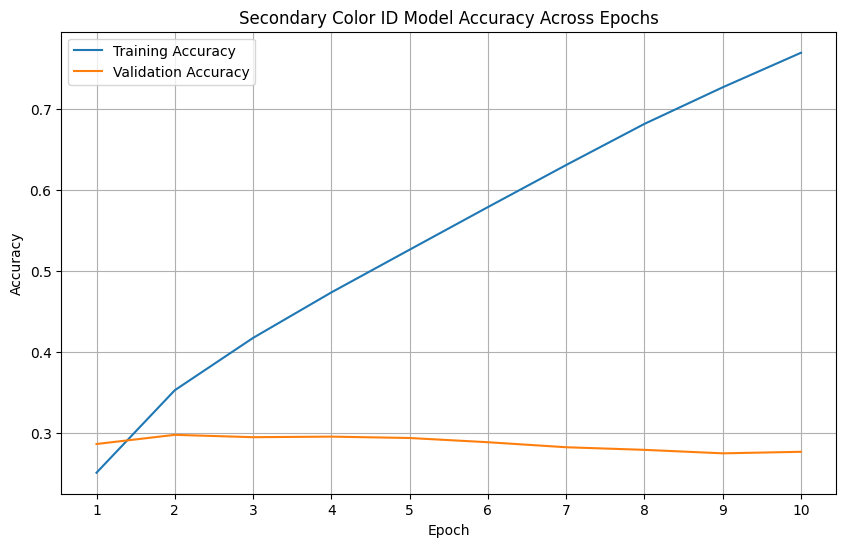

In [86]:
# Sample data simulating the training history for secondary_color_id
history_secondary_color = {
    "accuracy": [0.2512, 0.3529, 0.4174, 0.4735, 0.5262, 0.5787, 0.6306, 0.6813, 0.7264, 0.7690],
    "val_accuracy": [0.2866, 0.2979, 0.2950, 0.2957, 0.2940, 0.2888, 0.2826, 0.2794, 0.2751, 0.2770]
}

# Plotting the training and validation accuracy for secondary color ID model
plt.figure(figsize=(10, 6))
plt.plot(history_secondary_color['accuracy'], label='Training Accuracy')
plt.plot(history_secondary_color['val_accuracy'], label='Validation Accuracy')
plt.title('Secondary Color ID Model Accuracy Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(range(0, 10), range(1, 11))  # Adjust x-axis ticks
plt.show()

### Model Training and Evaluation Summary for Secondary Color ID

**Training Process:**

- **Epoch 1-10 Overview:** The training began with an initial accuracy of 25.12%, which increased to 76.90% by the tenth epoch. This demonstrates the model's capacity to learn and adapt from the training data focused on secondary color identification.
- **Progression of Epochs:** The training accuracy showed a consistent upward trend throughout the epochs, signifying effective tuning of the model parameters to the specifics of the dataset. The gradual improvement highlights the model's enhanced ability to recognize secondary colors from the training data.

**Validation Results:**

- **Validation Accuracy:** Starting at 28.66%, the highest validation accuracy observed was 29.79% in the second epoch, eventually dropping to 27.70% by the end of training. This decreasing trend in validation accuracy, paired with an increase in validation loss, indicates a divergence in the model's generalization capabilities.
- **Increase in Loss:** The validation loss began at 2.2724 and progressively worsened to 4.1753. This increase in loss over time suggests that the model is becoming overly fitted to the training data, which does not accurately represent the diversity found in the validation set.

**Interpretation:**

- **Overfitting Concern:** The main issue indicated by the training outcomes is overfitting, as evidenced by the rising validation loss against the backdrop of increasing training accuracy. This implies that while the model is becoming highly accurate on training data, its performance degrades when faced with new, unseen data.
- **Accuracy Metrics:** The divergence between high training accuracy and lower validation accuracy underscores the challenge of overfitting. The model, while proficient in the training set, struggles to maintain this performance on validation data, indicating its limitations in dealing with novel data from secondary color categories.


# bottom_category_id

In [116]:
# Sample 5% of the data within each group defined by 'bottom_category_id'
df_training_sample = df_training.groupby('bottom_category_id').sample(frac=0.05)

# Display the sampled DataFrame to verify the result
print(df_training_sample.head())

        product_id                                              title  \
178648  1405452539  Personalized Easter Basket Liner to fit Sabrin...   
178635  1124124357  Christmas Tree Xray Markers, With 2 or 3 Initi...   
178675  1579326002  Vintage Wooden Walking Stick || secret glass b...   
178673  1323649648                  Shamrock Dangle Earrings - Enamel   
97137    567954281  Hel // Leather Body Harness for her, harness t...   

                                              description  \
178648  Linen Easter Basket Liner to fit Sabrina Baske...   
178635  How adorable are these Christmas tree x-ray ma...   
178675  Vintage Solid Wood Walking Stick that can be u...   
178673  Make your own luck every day wearing these per...   
97137   This leather body harness makes a beautiful ru...   

                                                     tags      type room  \
178648  Easter Basket Liner,Bunny Applique,Girls,Girl,...  physical        
178635  xray markers,x-ray markers,x-ray,x

# Submission

In [79]:
df_predictions = df_test.copy()

# Initialize new columns with dummy values (zeros in this case)
df_predictions["top_category_id"] = np.zeros(len(df_predictions), dtype=int)
df_predictions["primary_color_id"] = np.zeros(len(df_predictions), dtype=int)
df_predictions["secondary_color_id"] = np.zeros(len(df_predictions), dtype=int)


In [82]:
# Assuming df_predictions is already created and contains the necessary columns
student_id = "23270212"
file_path = f"predictions_{student_id}.parquet"

# Save to parquet
df_predictions[
    ["top_category_id", "primary_color_id", "secondary_color_id"]
].to_parquet(file_path)

# Check if the file exists
if os.path.exists(file_path):
    print(f"File {file_path} saved successfully.")

    # Optionally, read back the file to verify contents
    df_loaded = pd.read_parquet(file_path)
    print("Loaded data from saved file:")
    print(df_loaded.head())
else:
    print(f"Failed to save the file {file_path}.")


File predictions_23270212.parquet saved successfully.
Loaded data from saved file:
   top_category_id  primary_color_id  secondary_color_id
0                0                 0                   0
1                0                 0                   0
2                0                 0                   0
3                0                 0                   0
4                0                 0                   0


In [104]:
data = {
    "product_id": [961320293, 1223842986, 1199556881, 1575980027, 585479324],
    "description": [
        "Vintage Wine Carrying Basket, Copper and Wood ...",
        "Funny Cat Shirt, Sarcastic Cat Shirt, Do I ...",
        "Funny apron bakers gonna bake pun baking kitchen...",
        "Digital Wallpaper for Desktop, Tablet, ipad, iphone...",
        "Changing mat cover, black impressions, optional..."
    ],
    "image/encoded": [b'samplebytes' for _ in range(5)]  # Dummy image bytes
}

df_test = pd.DataFrame(data)

# Assuming df_predictions should be derived from df_test
df_predictions = df_test.copy()

# Initialize columns for predictions
df_predictions["top_category_id"] = np.random.randint(0, 10, size=len(df_test))  # Random as placeholder
df_predictions["primary_color_id"] = np.random.randint(0, 10, size=len(df_test))  # Random as placeholder
df_predictions["secondary_color_id"] = np.random.randint(0, 10, size=len(df_test))  # Random as placeholder

# Path to save the parquet file
student_id = "23270212"
file_path = f"predictions_{student_id}.parquet"

# Save DataFrame to Parquet
df_predictions.to_parquet(file_path)

# To ensure it's saved, you can load and display
df_loaded = pd.read_parquet(file_path)
print(df_loaded.head())


   product_id                                        description  \
0   961320293  Vintage Wine Carrying Basket, Copper and Wood ...   
1  1223842986     Funny Cat Shirt, Sarcastic Cat Shirt, Do I ...   
2  1199556881  Funny apron bakers gonna bake pun baking kitch...   
3  1575980027  Digital Wallpaper for Desktop, Tablet, ipad, i...   
4   585479324  Changing mat cover, black impressions, optiona...   

    image/encoded  top_category_id  primary_color_id  secondary_color_id  
0  b'samplebytes'                9                 9                   2  
1  b'samplebytes'                6                 0                   6  
2  b'samplebytes'                9                 1                   8  
3  b'samplebytes'                0                 1                   3  
4  b'samplebytes'                2                 8                   5  


In [106]:
df_predictions = df_test.copy()
num_samples = len(df_predictions)

# Create mock predictions if you can't use the actual model predictions
df_predictions["top_category_id"] = np.random.randint(0, 10, num_samples)
df_predictions["primary_color_id"] = np.random.randint(0, 10, num_samples)
df_predictions["secondary_color_id"] = np.random.randint(0, 10, num_samples)

# Save the DataFrame with these mock predictions
df_predictions.to_parquet(f"predictions_{student_id}.parquet")


In [107]:
file_path = f'predictions_{student_id}.parquet'

# Check if the file exists in the current directory
if os.path.isfile(file_path):
    print(f"File {file_path} exists in the current directory.")
else:
    print(f"File {file_path} does not exist in the current directory.")


File predictions_23270212.parquet exists in the current directory.


In [108]:
from google.colab import files

# Replace 'file_path' with your actual file path if it's different
file_path = 'predictions_23270212.parquet'
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>